In [1]:
import pandas as pd
from MonteCarloSimulator import MonteCarloSimulatorWithConstantVol, MonteCarloSimulatorWithHeston
from MonteCarloPricerBS import MonteCarloCallPricerBS, MonteCarloAsiaticCallPricerBS, MonteCarloLookBackMaxPricerBS, MonteCarloLookBackMinPricerBS
from MonteCarloPricerHeston import MonteCarloCallPricerHeston, MonteCarloAsiaticCallPricerHeston
import numpy as np
import matplotlib.pyplot as plt
from HestonSemiClosedFormula import HestonSemiAnalyticalFormula
from HestonCalibrator import HestonCalibrator
import datetime

<Axes: >

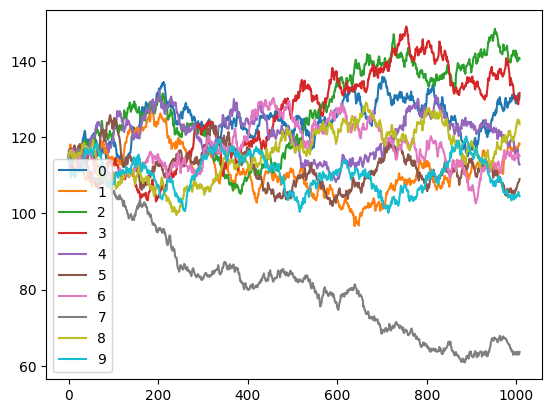

In [2]:
#Simulation des trajectoires de S
S, K, T, sigma, r,d  = 100, 100, 2, 0.1, 0.05, 0.01
num_sim = 10
StockSimulator = MonteCarloSimulatorWithConstantVol(S, r, d, sigma,  num_sim)
paths = StockSimulator.spot_paths_simulator(T=4,antithetic= False)
df = pd.DataFrame(paths).T
df.plot()

In [6]:
#MonteCarlo-BS
num_sim = 1000
MonteCarloCallPricerBS(S, r, d, sigma, T, K, num_sim, True).price()

9.901430246482898

In [8]:
#Pricing d'un asiatique
monte_carlo_asiatic_call_pricer = MonteCarloAsiaticCallPricerBS(S, r, d, sigma, T, K, num_sim, False)
monte_carlo_asiatic_call_pricer.price()

7.7773016887662525

In [9]:
#Pricing d'un LookBack max
MonteCarloLookBackMaxPricerBS(S, r, d, sigma, T, K, num_sim, True).price()

18.07238952394155

In [10]:
#Pricing d'un LookBack max
MonteCarloLookBackMinPricerBS(S, r, d, sigma, T, K, num_sim, True).price()

1.360265077565251

In [12]:
#Test de prix d'un call avec Monte-Carlo Heston
S, K, T, sigma, r, num_sim, anthitetic = 100, 100, 2, 0.1, 0.05, 10000, False
kappa, theta, rho, xi = 4, 0.02, -0.9, 0.9
monte_carlo_call_pricer = MonteCarloCallPricerHeston(S, K,r, d, sigma, kappa, theta, rho, xi, T, num_sim, anthitetic)
monte_carlo_call_pricer.price()

14.217923079358023

In [13]:
market_date = datetime.date(2024,1, 26)
ticker = 'AAPL'
mode = 'Calls'
r = 0.04
d =0 

In [14]:
Calibrator=HestonCalibrator(market_date, ticker, mode, r, d)

c:\Users\moham\OneDrive\Bureau\asset_pricing_project\import_data\import_data.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return self.ticker.history(start = start_date, end = end_date)['Close'][0]


In [15]:
#Calibration des paramètres
theta, rho, kappa, xi, sigma=Calibrator.HestonParameters()

In [25]:
S, K, T, sigma, r, d = (Calibrator.S, 182.,1, 0.345899864635966, 0.04, 0)

In [31]:
#Prix Monte Carlo avec paramètre de Heston calibré
num_sim = 15000
monte_carlo_call_pricer = MonteCarloCallPricerHeston(S, K,r, d, sigma, kappa, theta, rho, xi, T, num_sim, False)
monte_carlo_call_pricer.price()

33.05222164361402

In [26]:
heston_formula =HestonSemiAnalyticalFormula(S,K, T, sigma, r, d, kappa, theta, rho, xi)
heston_formula.call_price()

24.903186220089403

<Axes: >

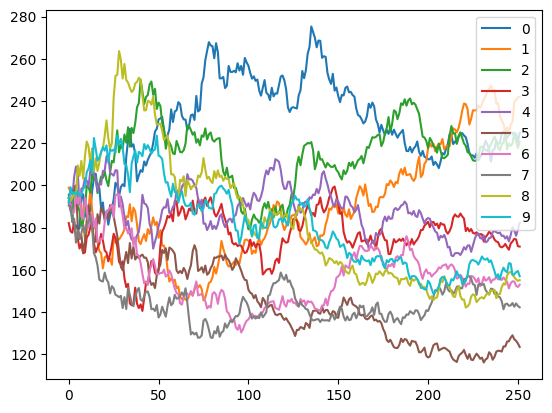

In [23]:
#Simulation de trajectoire à l'aide de l'EDS d'Heston
num_sim = 10
StockSimulator = MonteCarloSimulatorWithHeston(S, r, d, sigma, kappa, theta, rho, xi, num_sim)
paths = StockSimulator.spot_paths_simulator(1,False)
df = pd.DataFrame(paths).T
df.plot()